**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
visa_df=pd.read_csv(r"C:\Users\Lenovo\Python NareshIT\Data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Select numerical columns**

In [3]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**prevailing_wage**

- len
- max, min
- mean, median, std
- 75%, 50%, 25%

**Count or Length**

In [4]:
len(visa_df['prevailing_wage'])

25480

**Max, Min**

In [8]:
max(visa_df['prevailing_wage']) #Keyword

319210.27

In [9]:
np.max(visa_df['prevailing_wage']) #Numpy

319210.27

In [11]:
visa_df['prevailing_wage'].max() # Pandas

319210.27

In [7]:
min(visa_df['prevailing_wage'])

2.1367

**Mean**

In [12]:
visa_df['prevailing_wage'].mean()

74455.81459209183

**Median**

In [13]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

**Std**

In [14]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [15]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

In [5]:
#All together
list_val=[]
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)

list_val=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std]

index_val=['count','min','max','mean','median','std']
#Create a dataFrame
pd.DataFrame(list_val,columns=['prevailing_wage'],index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


**Percentile and Quantile**

- Percentile: np.percentile()
    - Two parameters:
        - data: a
        - Percentile: q The values vary from 0 to 100
- Quantile: np.quantile()
    - Two parameters:
        - data: a
        - percentile: q The values vary from 0 to 1
        - If you want 50P then q=0.5

**25p, 50p, 75p**

In [6]:
# Percentile
wage_25p = round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p = round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p = round(np.percentile(visa_df['prevailing_wage'],75),2)

print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


In [7]:
# Quantile
wage_25p = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p = round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'],0.75),2)

print(f"The 25% data is {wage_25p}")
print(f"The 50% data is {wage_50p}")
print(f"The 75% data is {wage_75p}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


**Understand the percentiles**

- Definition of 25percentile:
- Eg:
    - There are 25% of employees has salary less than 34015
    - Total employees = 25480
    - 25% of employees = 25*25480/100 = 6370
    - 6370 employees salary less than 34015


In [32]:
# For 25% data
con=visa_df['prevailing_wage']<wage_25p
len(visa_df[con])

6370

In [31]:
# For 50% data
con=visa_df['prevailing_wage']<wage_50p
len(visa_df[con])

12740

In [30]:
# For 75% data
con=visa_df['prevailing_wage']<wage_75p
len(visa_df[con])

19110

**Imperical Rule (68-95-99.7)**

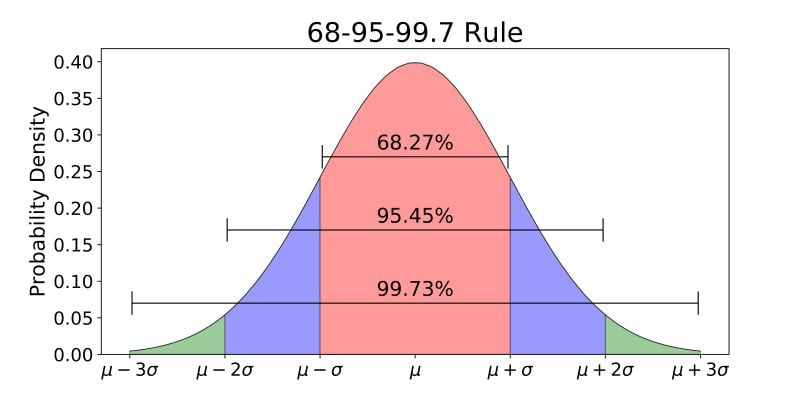

- Tha data coverage between μ ± iσ
    - Where i=1,2,3

In [36]:
v1=wage_mean-1 * wage_std
v2=wage_mean+1 * wage_std
con1=visa_df['prevailing_wage'] > v1
con2=visa_df['prevailing_wage'] < v2
count1=len(visa_df[con1 & con2])
#wage_68p = np.percentile(visa_df['prevailing_wage'],68)
count1

17171

In [38]:
68*25480/100 # maybe the data might be skewed

17326.4

$For 95%$

In [47]:
v1=wage_mean-2 * wage_std
v2=wage_mean+2 * wage_std
con1=visa_df['prevailing_wage'] > v1
con2=visa_df['prevailing_wage'] < v2
count2=len(visa_df[con1 & con2])
#wage_95p = np.percentile(visa_df['prevailing_wage'],95)
count2, 95*25480/100

(24582, 24206.0)

$For$ $99.7$

In [48]:
v1=wage_mean-3 * wage_std
v2=wage_mean+3 * wage_std
con1=visa_df['prevailing_wage'] > v1
con2=visa_df['prevailing_wage'] < v2
count3=len(visa_df[con1 & con2])
#wage_99.7p = np.percentile(visa_df['prevailing_wage'],99.7)
count3, 99.7*25480/100

(25186, 25403.56)

In [9]:
#All together
list_val=[]
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
#################################################################

wage_25p = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p = round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p = round(np.quantile(visa_df['prevailing_wage'],0.75),2)

##################################################################

list_val=[wage_count,wage_min,wage_max,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]

index_val=['count','min','max','mean','median','std','25%','50%','75%']

#Create a dataFrame
pd.DataFrame(list_val,columns=['prevailing_wage'],index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


**no_of_employees**

In [18]:
#All together
col_name= visa_df.select_dtypes(exclude='object').columns
list_val=[]

for i in col_name:
    count=round(len(visa_df[i]),2)
    min=round(visa_df[i].min(),2)
    max=round(visa_df[i].max(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)
#################################################################

    p_25 = round(np.quantile(visa_df[i],0.25),2)
    p_50 = round(np.quantile(visa_df[i],0.50),2)
    p_75 = round(np.quantile(visa_df[i],0.75),2)

##################################################################
    
    list_val.append([count,min,max,mean,median,std,p_25,p_50,p_75])
list_val
index_val=['count','min','max','mean','median','std','25%','50%','75%']

#Create a dataFrame
pd.DataFrame(list_val,columns=index_val,index=col_name).T # .T means transpose the values

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


**Describe function**

In [20]:
visa_df.describe() # Only for numerical data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- It can get by matplotlib or seaborn
- plt.hist()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

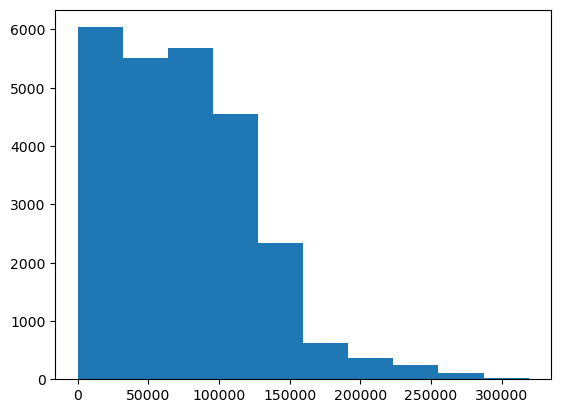

In [24]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'])
# First array will tell count
# Second array will tell about intervals
# From 2.13670000e+00 to 3.19229500e+04 --> 6038 members have salary

- Histogram will give 3 outputs:
    - Frequency --> how many observations are there
    - Interval --> interval range
    - No of intervals

**Check point-1**

In [25]:
2.13670000e+00, 3.19229500e+04

(2.1367, 31922.95)

In [26]:
con1=visa_df['prevailing_wage']>=2.1367
con2=visa_df['prevailing_wage']<=31922.95
len(visa_df[con1 & con2])

6038

**Bins**

<BarContainer object of 40 artists>


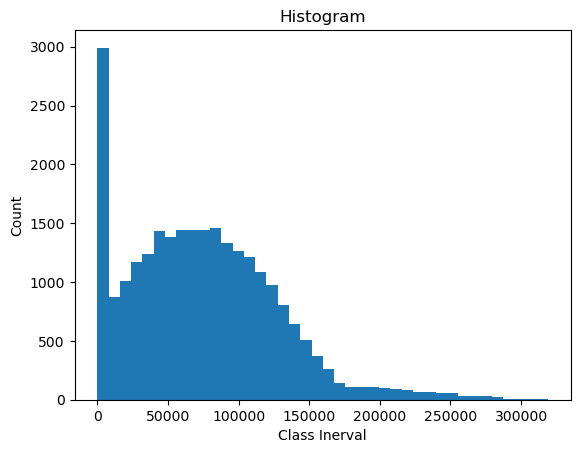

In [29]:
import matplotlib.pyplot as plt
f,i,n = plt.hist(visa_df['prevailing_wage'],
                bins=40)
plt.title('Histogram')
plt.xlabel('Class Inerval')
plt.ylabel('Count')
print(n) # The intervals are divided into 40

(array([  164.,   341.,   522.,   705.,   601.,   836.,   977.,  1818.,
         5424., 14092.]),
 array([1800. , 1821.6, 1843.2, 1864.8, 1886.4, 1908. , 1929.6, 1951.2,
        1972.8, 1994.4, 2016. ]),
 <BarContainer object of 10 artists>)

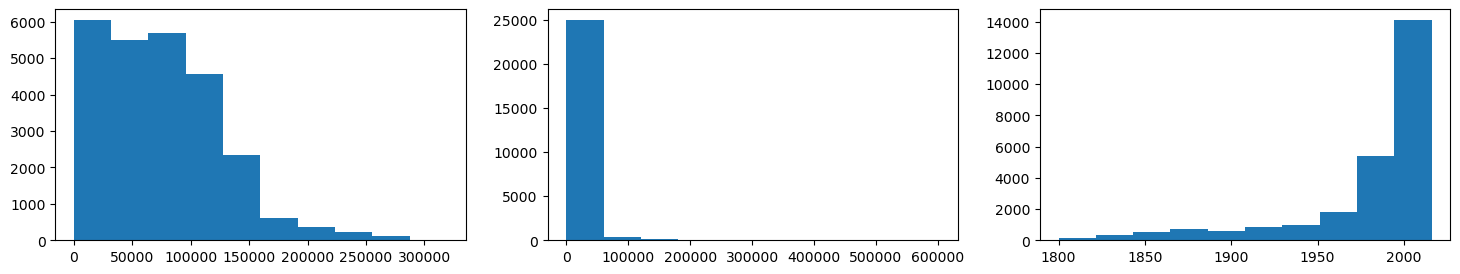

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'])
plt.title('Histogram')

############################################
plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'])

#############################################
plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'])



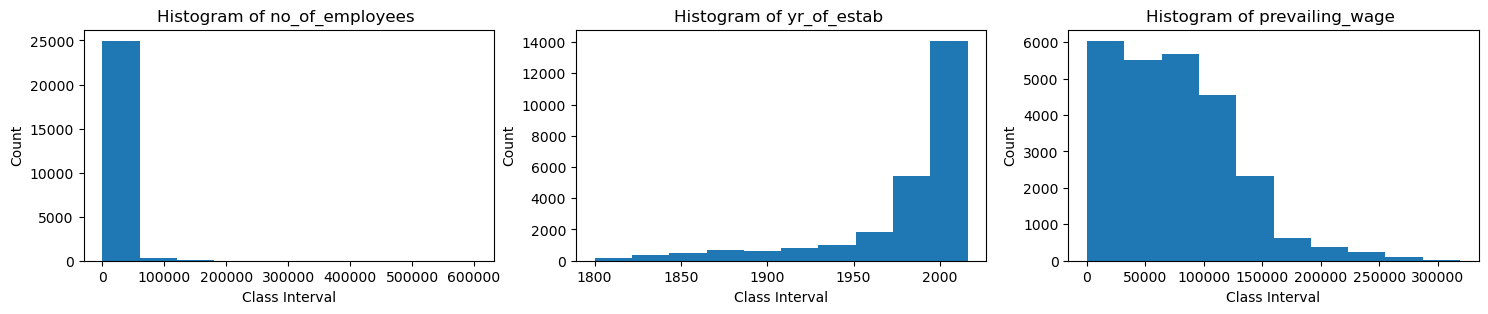

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
for i in range(len(col_name)):
    plt.subplot(1,len(col_name),i+1)
    plt.hist(visa_df[col_name[i]])
    plt.title(f"Histogram of {col_name[i]} ")
    plt.xlabel('Class Interval')
    plt.ylabel('Count')

**Histogram using Seaborn**

D:\Anaconda_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

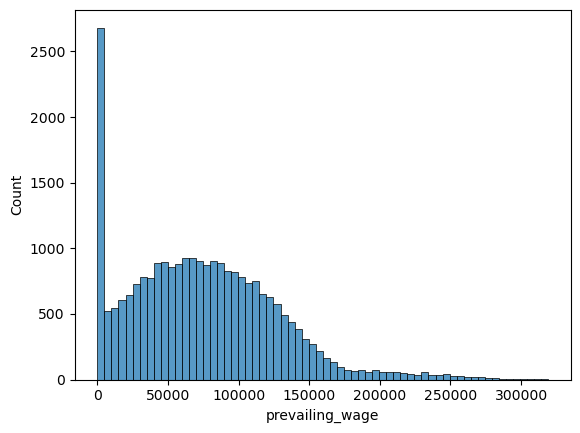

In [38]:
import seaborn as sns
sns.histplot(visa_df['prevailing_wage'])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

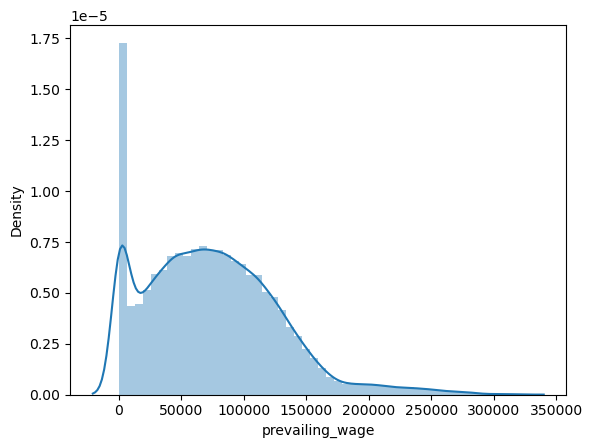

In [41]:
import warnings
warnings.filterwarnings('ignore') # removing the warnings

sns.distplot(visa_df['prevailing_wage'])

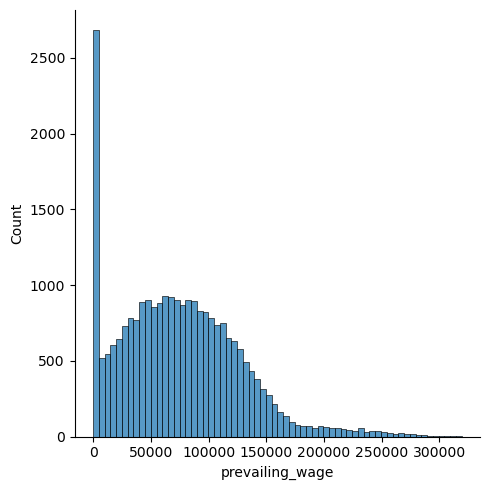

In [42]:
sns.displot(visa_df['prevailing_wage'])